In [1]:
#Step 3 - Data Cleansing, Detecting Outliers, Normalization
'''
In this notebook we are going to detect outliers in our dataset, handle them by capping or dropping,
and normalizing the variables to use them properly in the model.
'''

'\nIn this notebook we are going to detect outliers in our dataset, handle them by capping or dropping,\nand normalizing the variables to use them properly in the model.\n'

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_pickle('df_after_eda.pkl')
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,End_Year,End_Month,End_Day,End_DayOfWeek,End_Hour,End_Minute,End_Second,End_IsWeekend,Duration_Minutes,Duration_Hours
0,A1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,2016.0,2.0,8.0,0.0,11.0,0.0,0.0,0,314.0,5.233333
1,A2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,2016.0,2.0,8.0,0.0,6.0,37.0,59.0,0,30.0,0.500000
2,A3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,2016.0,2.0,8.0,0.0,7.0,19.0,27.0,0,30.0,0.500000
3,A4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,2016.0,2.0,8.0,0.0,7.0,53.0,34.0,0,30.0,0.500000
4,A5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,2016.0,2.0,8.0,0.0,8.0,9.0,7.0,0,30.0,0.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 64 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     string        
 1   Source                 category      
 2   Severity               category      
 3   Start_Time             datetime64[ns]
 4   End_Time               datetime64[ns]
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   End_Lat                float64       
 8   End_Lng                float64       
 9   Distance(mi)           float64       
 10  Description            string        
 11  Street                 string        
 12  City                   string        
 13  County                 string        
 14  State                  string        
 15  Zipcode                string        
 16  Country                string        
 17  Timezone               string        
 18  Airport_Code          

In [5]:
#checking n of missing values

df.isna().sum().sort_values(ascending=False)

End_Lat              3402762
End_Lng              3402762
Precipitation(in)    2203586
Wind_Chill(F)        1999019
Duration_Hours        743166
                      ...   
Junction                   0
No_Exit                    0
Railway                    0
Roundabout                 0
Give_Way                   0
Length: 64, dtype: int64

<Axes: >

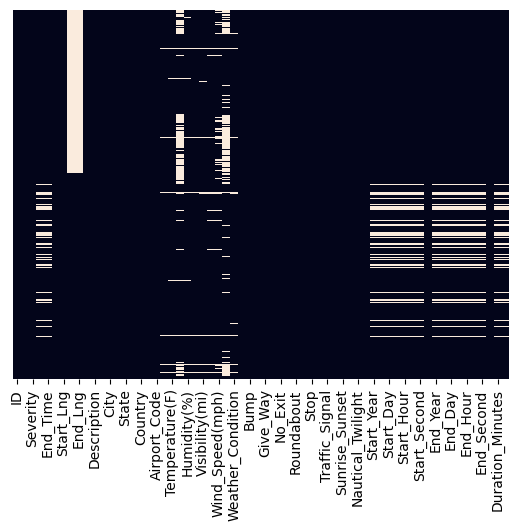

In [6]:
#missing values matrix 
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

<Axes: >

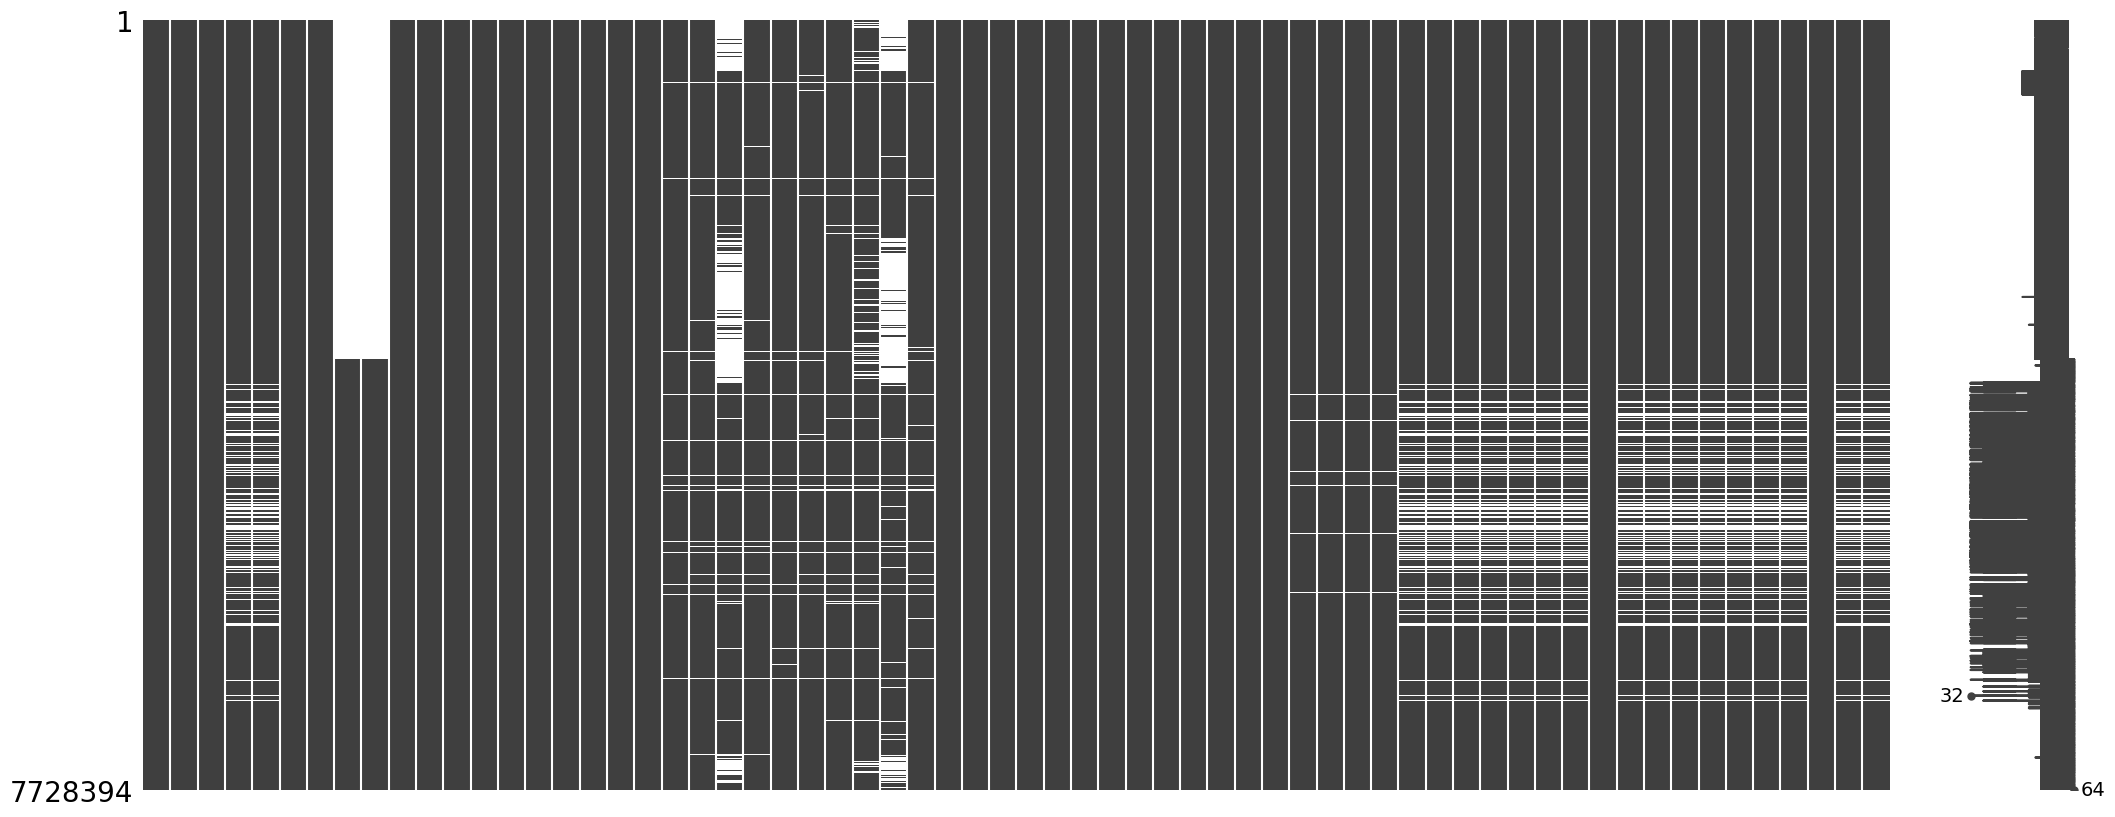

In [7]:
#missing value matrix by missingno libarary
#!pip install missingno
import missingno as msno
msno.matrix(df)


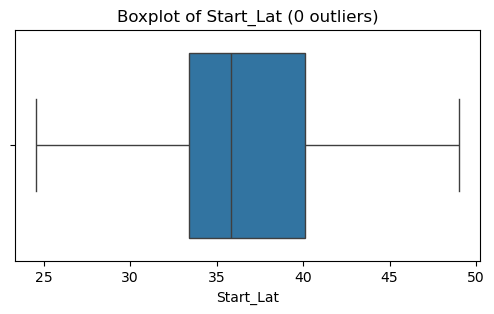

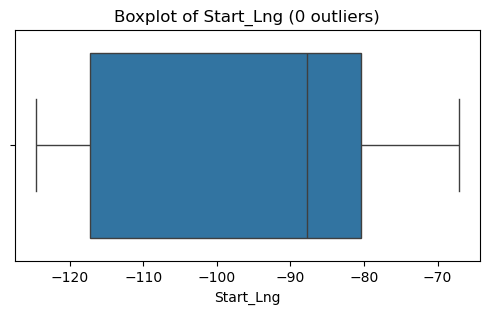

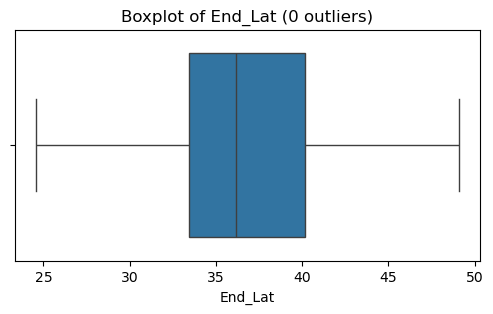

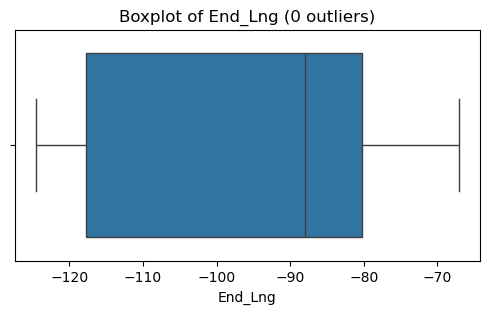

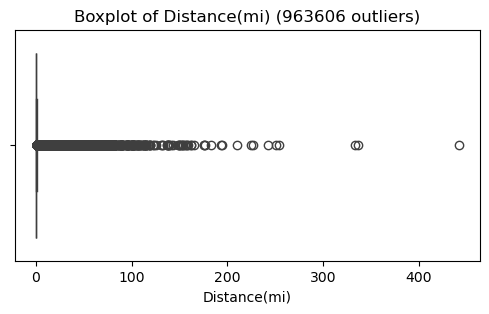

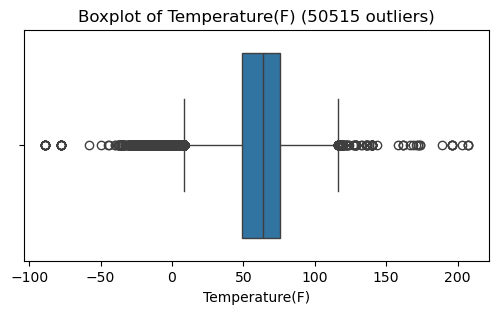

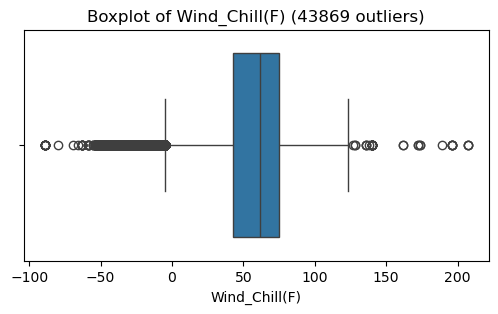

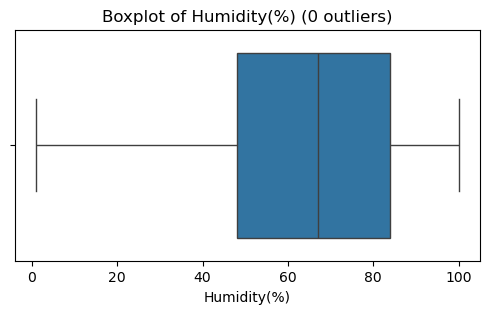

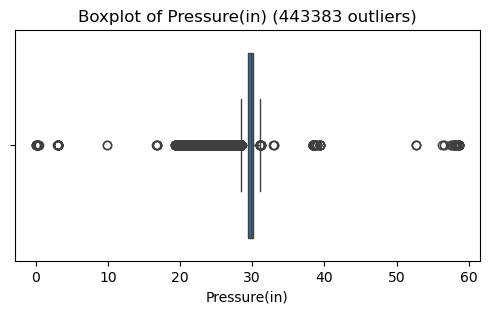

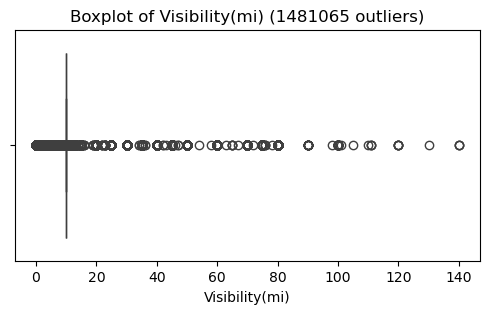

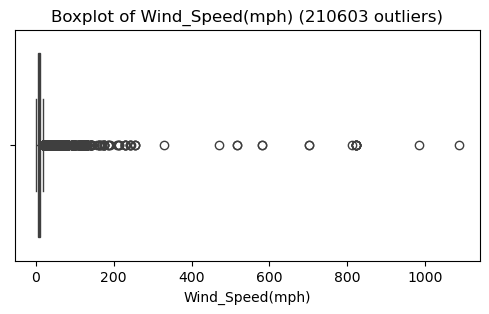

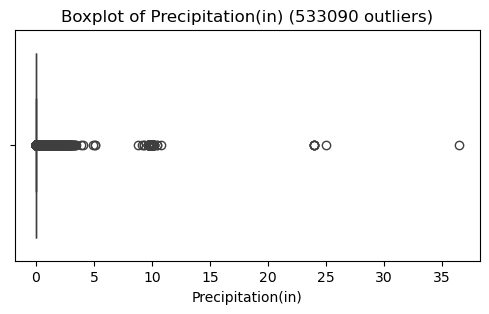

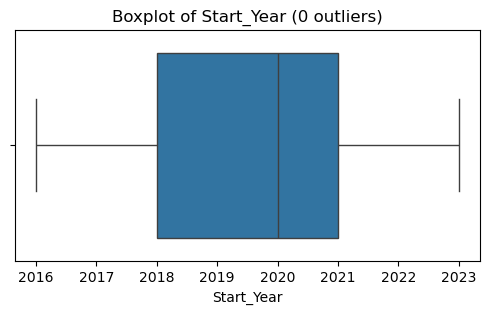

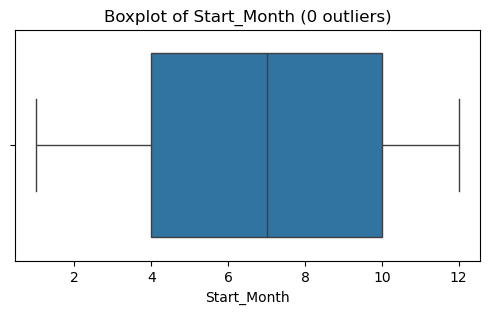

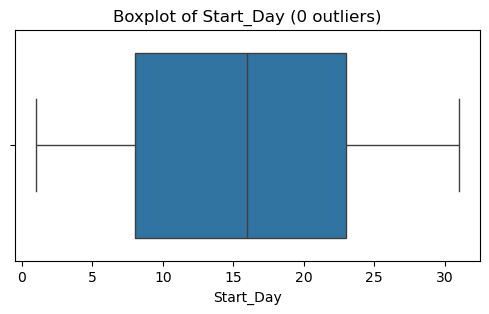

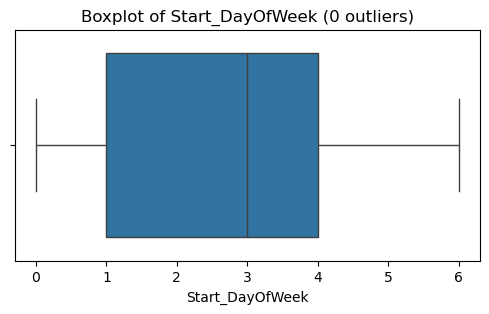

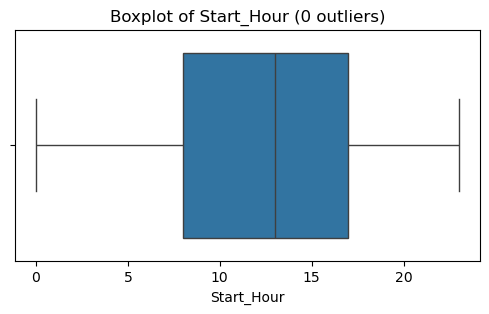

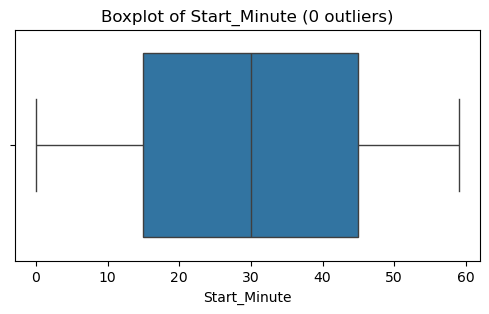

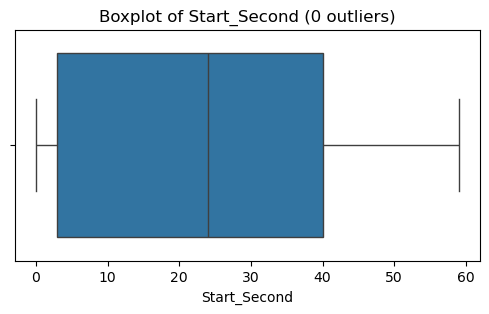

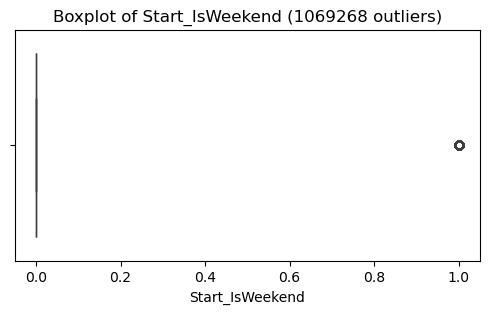

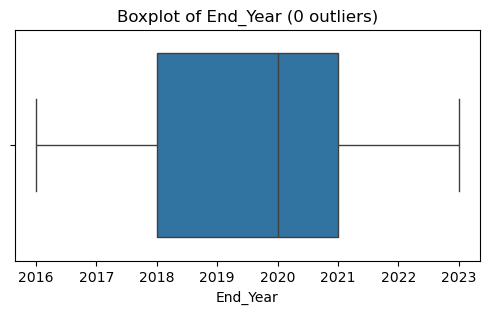

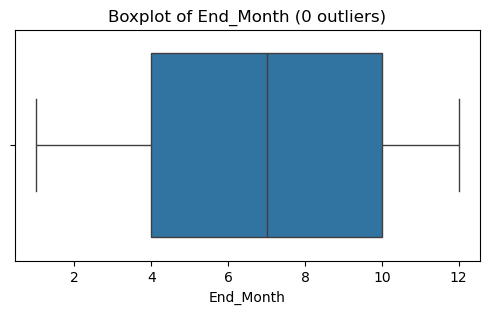

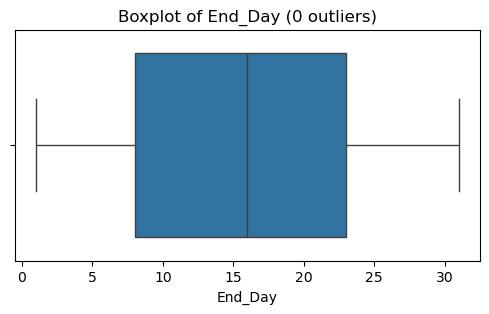

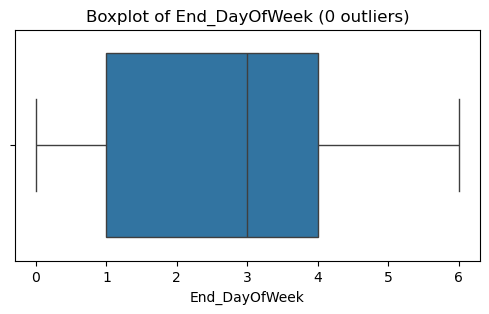

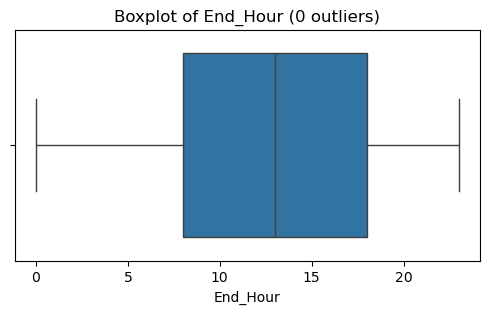

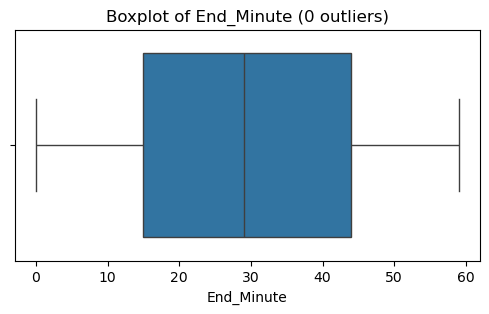

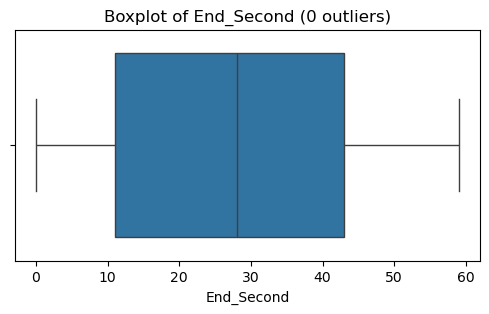

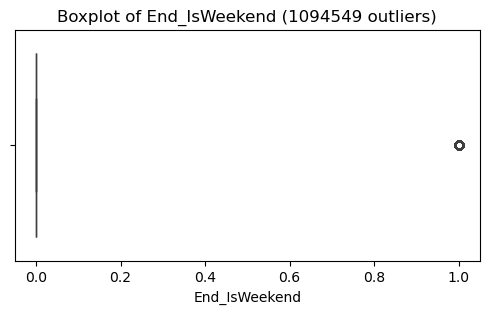

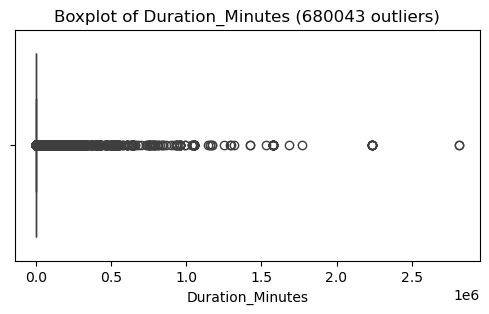

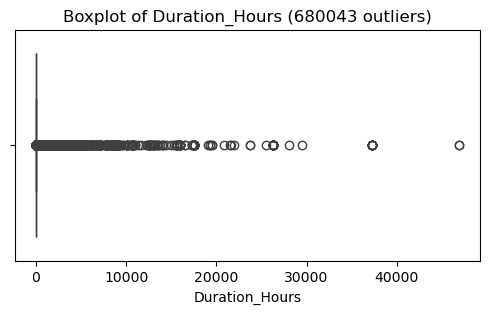

Outlier counts per column:
{'Start_Lat': 0, 'Start_Lng': 0, 'End_Lat': 0, 'End_Lng': 0, 'Distance(mi)': 963606, 'Temperature(F)': 50515, 'Wind_Chill(F)': 43869, 'Humidity(%)': 0, 'Pressure(in)': 443383, 'Visibility(mi)': 1481065, 'Wind_Speed(mph)': 210603, 'Precipitation(in)': 533090, 'Start_Year': 0, 'Start_Month': 0, 'Start_Day': 0, 'Start_DayOfWeek': 0, 'Start_Hour': 0, 'Start_Minute': 0, 'Start_Second': 0, 'Start_IsWeekend': 1069268, 'End_Year': 0, 'End_Month': 0, 'End_Day': 0, 'End_DayOfWeek': 0, 'End_Hour': 0, 'End_Minute': 0, 'End_Second': 0, 'End_IsWeekend': 1094549, 'Duration_Minutes': 680043, 'Duration_Hours': 680043}


In [8]:
#Detect and visualize outliers for all numeric columns
import seaborn as sns
import matplotlib.pyplot as plt

def detect_outliers_iqr(df):
    """
    Detects outliers in all numeric columns using the IQR method
    and plots boxplots for visualization.
    """
    numeric_cols = df.select_dtypes(include=['number']).columns
    outlier_summary = {}

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)]

        outlier_summary[col] = len(outliers)

        # Plot boxplot
        plt.figure(figsize=(6, 3))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col} ({len(outliers)} outliers)')
        plt.show()

    return outlier_summary

# Run it
outlier_counts = detect_outliers_iqr(df)
print("Outlier counts per column:")
print(outlier_counts)


In [9]:
#handeling outliers using capping, Capping is a way to limit extreme values in your data without removing rows.

'''
This Function: 
Detects and caps outliers in all numeric columns (percentile-based).

Shows before-and-after boxplots for each column so you can visually inspect the effect.

Returns the cleaned DataFrame and a summary of capped values.
'''

def cap_outliers_with_plots(df, lower_pct=0.005, upper_pct=0.995):
    """
    Caps outliers for all numeric columns using percentile thresholds,
    and plots boxplots before and after capping.
    
    Parameters:
    - df: pandas DataFrame
    - lower_pct: lower percentile (default 0.5%)
    - upper_pct: upper percentile (default 99.5%)
    
    Returns:
    - df_capped: DataFrame with outliers capped
    - summary: dictionary with counts of capped values per column
    """
    
    df_capped = df.copy()
     # Select only continuous numeric columns (exclude binary/categorical)
    numeric_cols = df_capped.select_dtypes(include='number').columns
    continuous_cols = [col for col in numeric_cols if df_capped[col].nunique() > 2]
    summary = {}
    
    for col in continuous_cols:
        lower = df_capped[col].quantile(lower_pct)
        upper = df_capped[col].quantile(upper_pct)
        
        # Count values to be capped
        count_lower = (df_capped[col] < lower).sum()
        count_upper = (df_capped[col] > upper).sum()
        summary[col] = {'capped_lower': count_lower, 'capped_upper': count_upper}
        
        # Plot boxplot before capping
        plt.figure(figsize=(8,3))
        sns.boxplot(x=df_capped[col])
        plt.title(f'{col} - Before Capping ({count_lower} low, {count_upper} high)')
        plt.show()
        
        # Cap the outliers
        df_capped[col] = df_capped[col].clip(lower, upper)
        
        # Plot boxplot after capping
        plt.figure(figsize=(8,3))
        sns.boxplot(x=df_capped[col])
        plt.title(f'{col} - After Capping')
        plt.show()
    
    return df_capped, summary


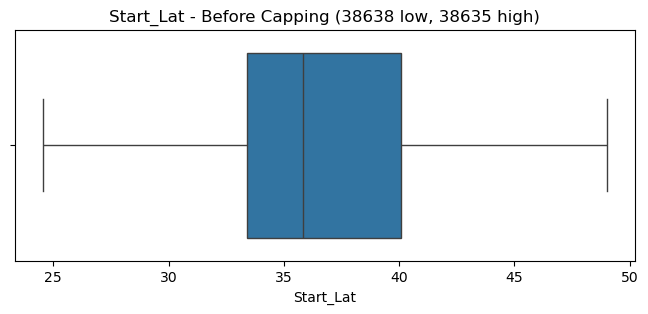

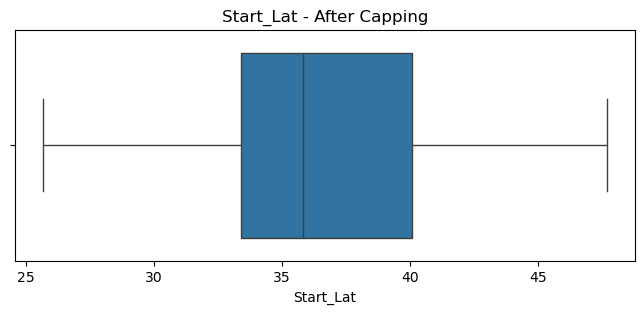

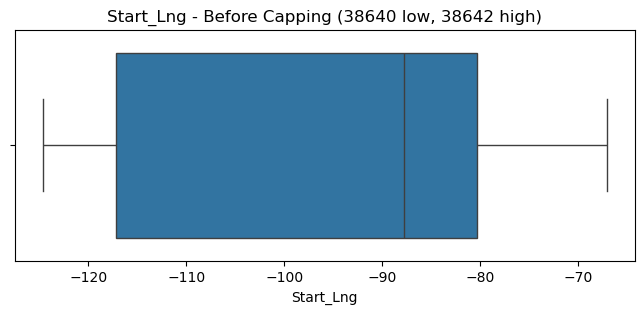

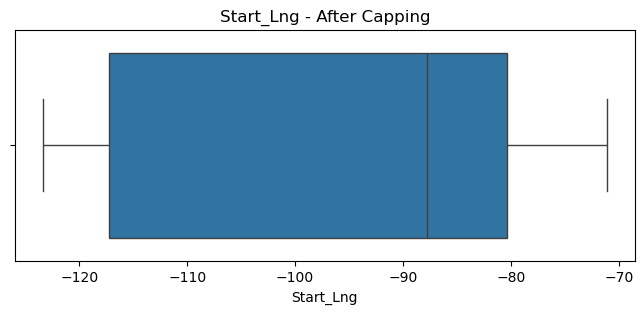

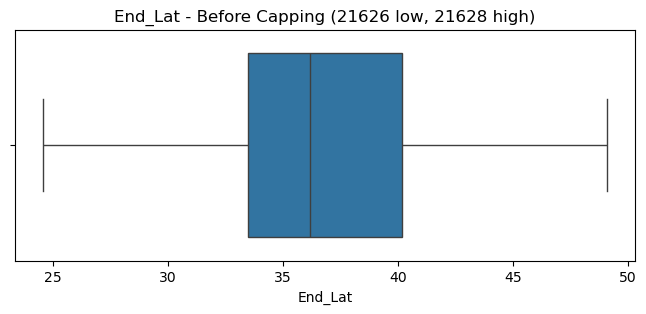

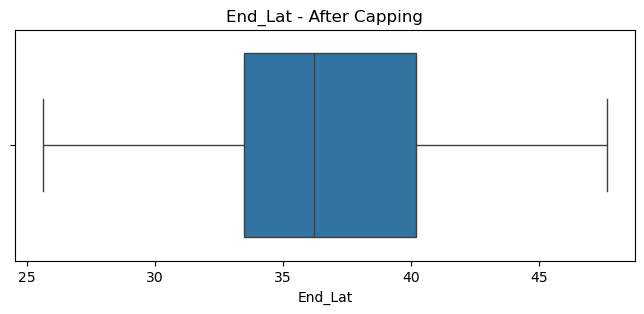

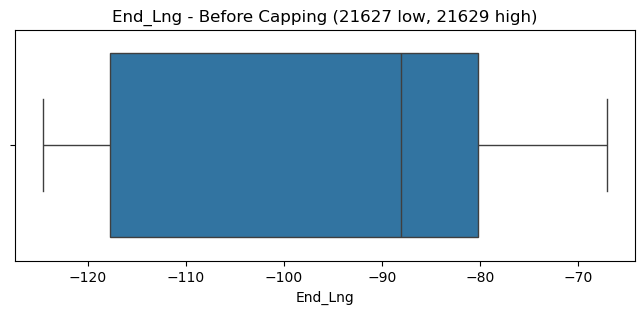

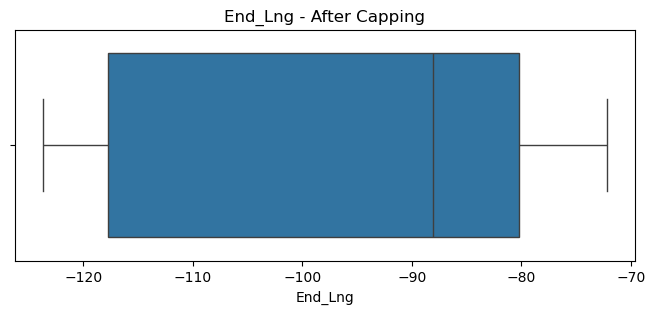

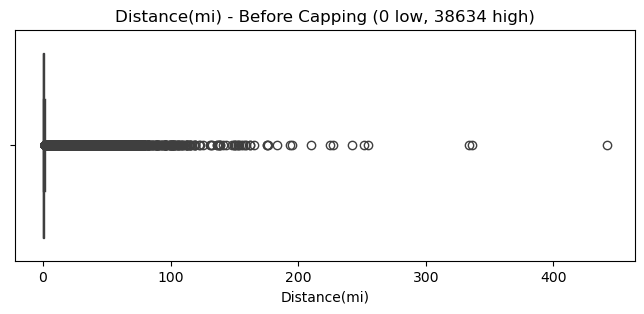

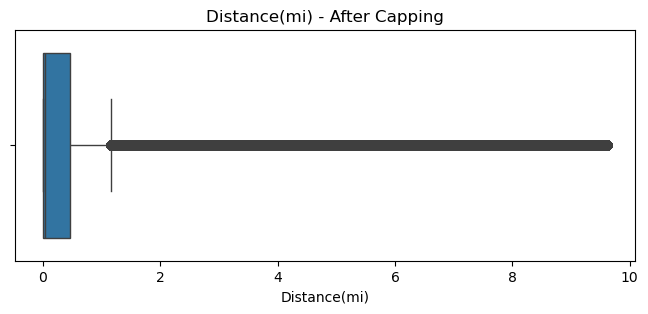

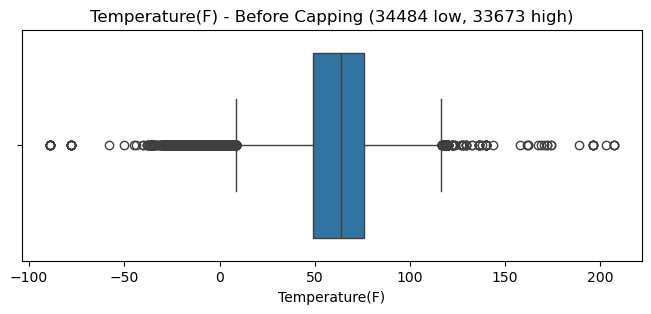

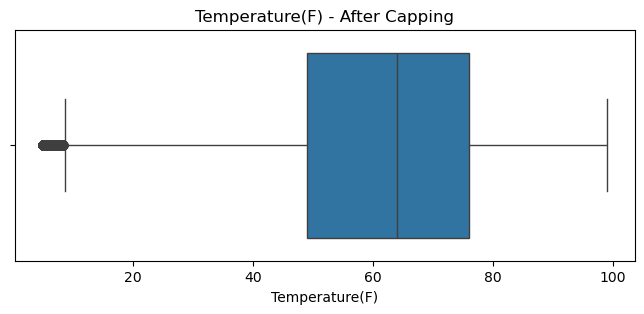

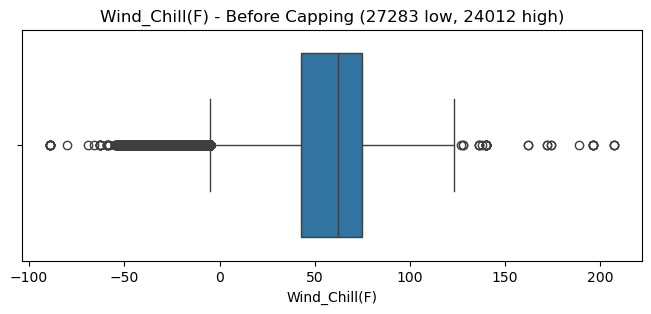

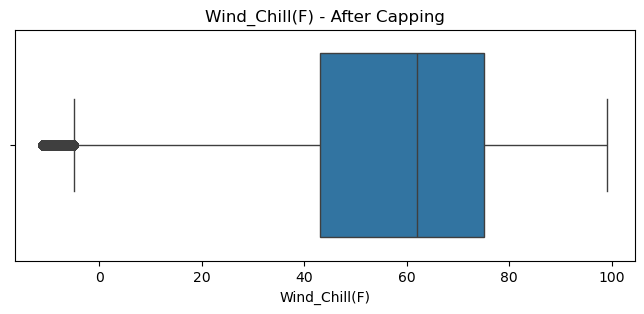

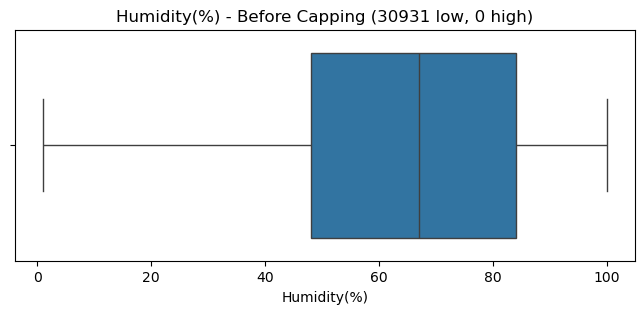

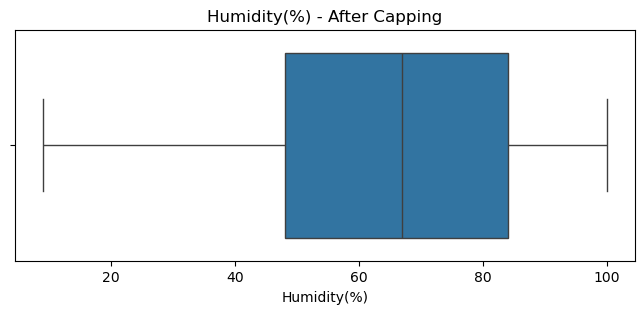

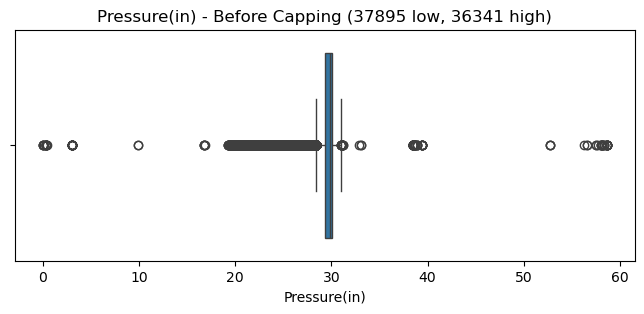

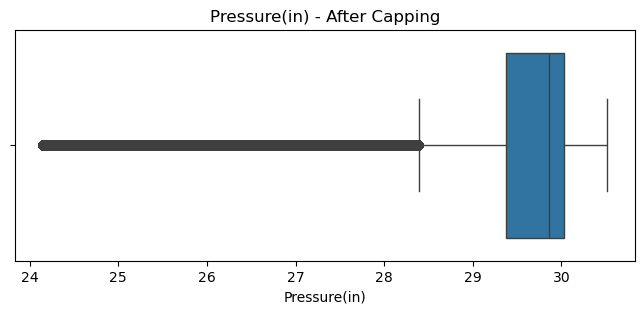

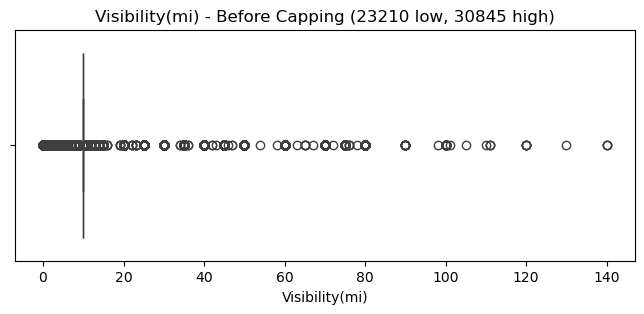

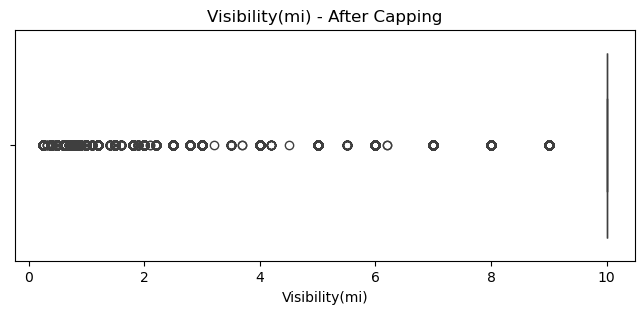

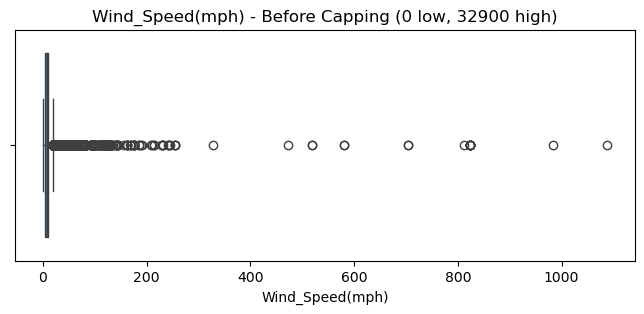

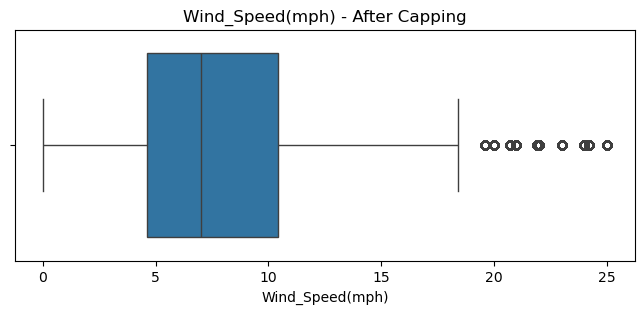

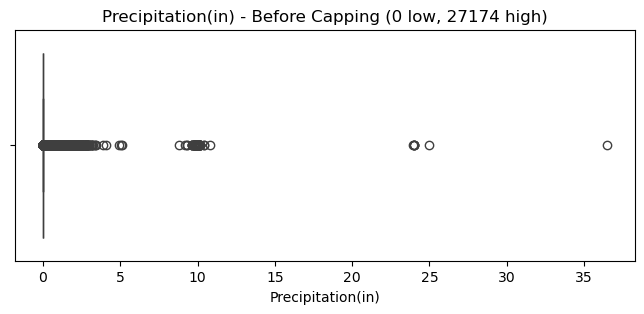

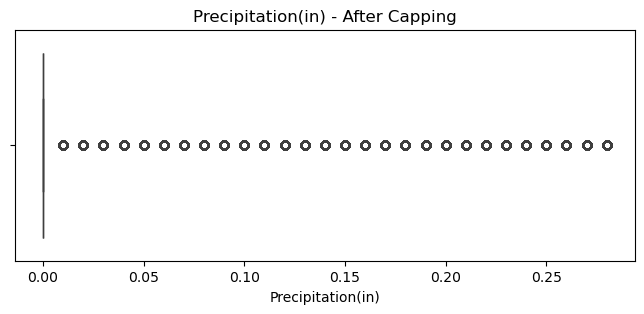

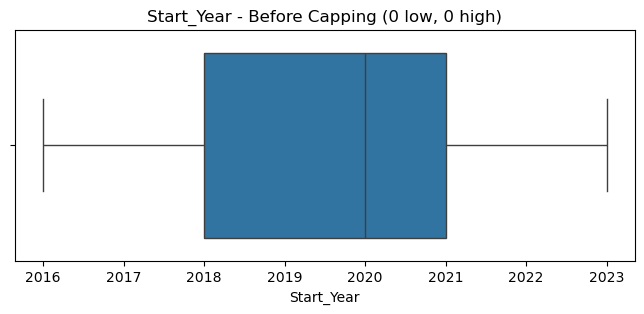

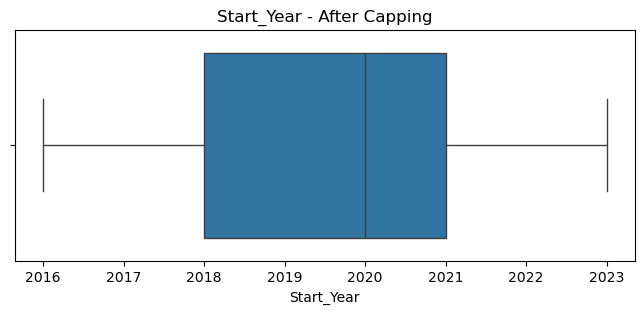

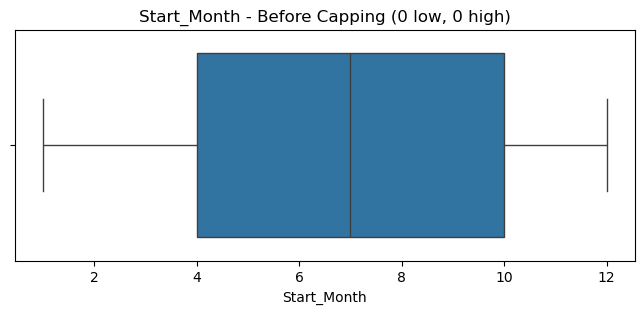

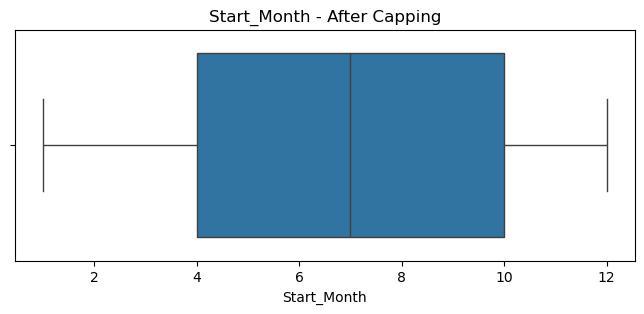

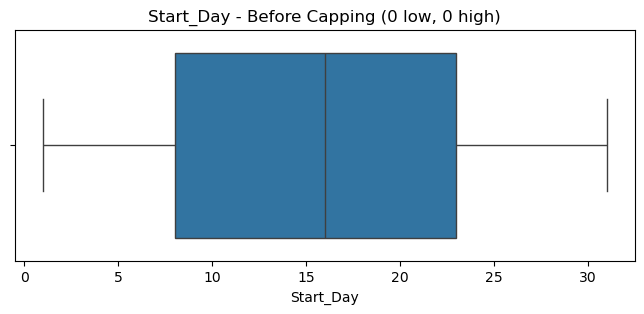

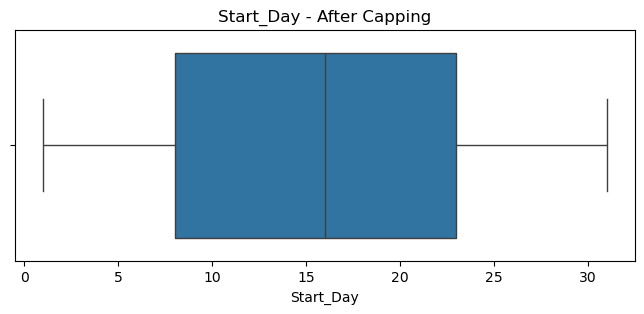

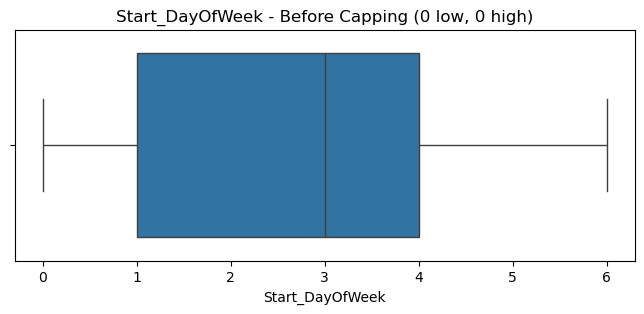

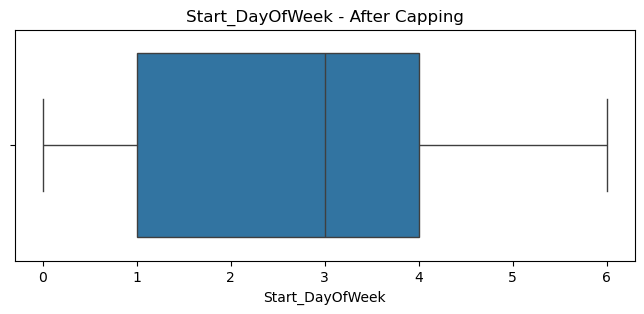

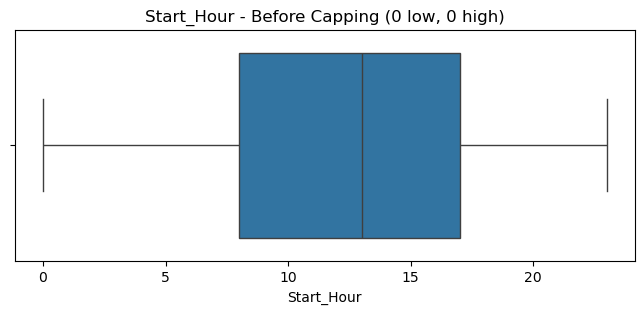

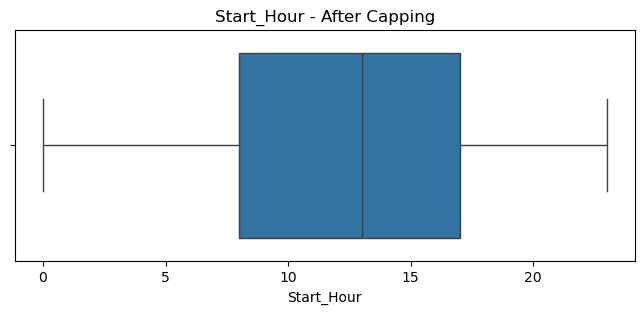

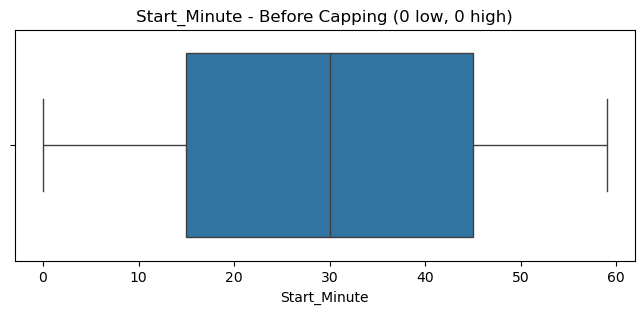

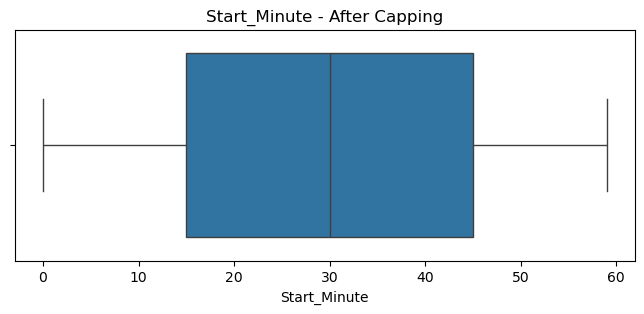

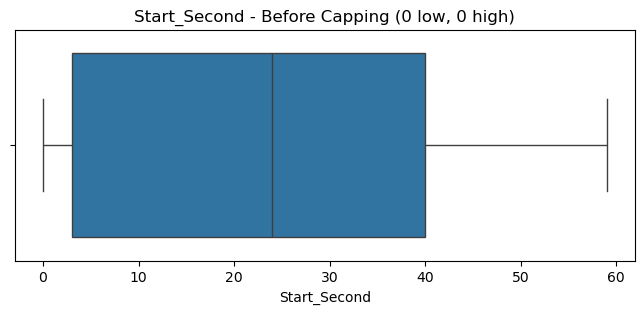

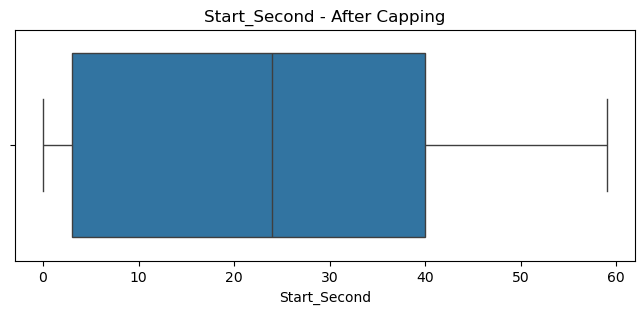

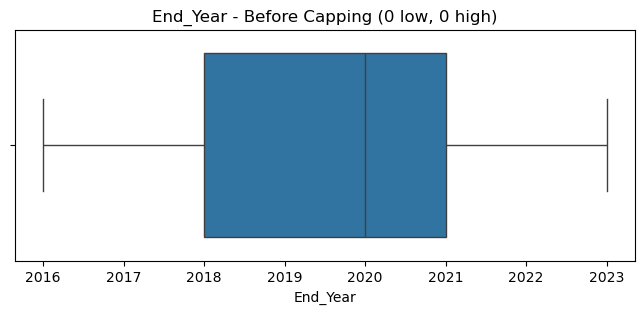

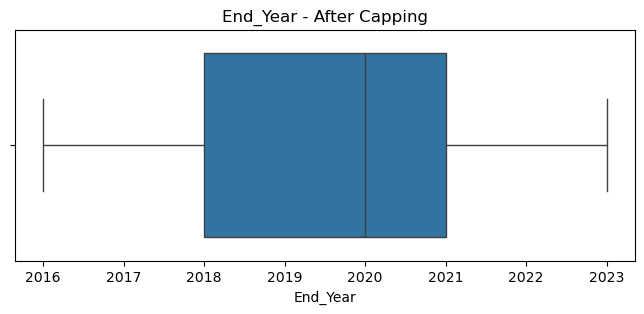

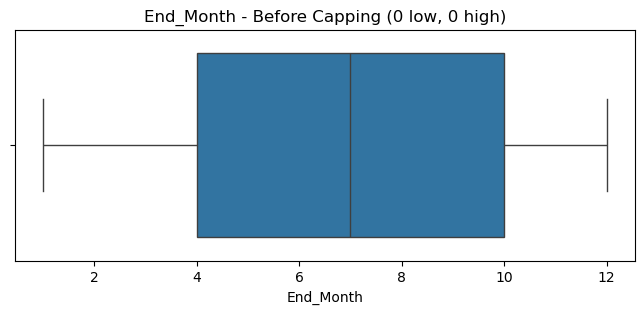

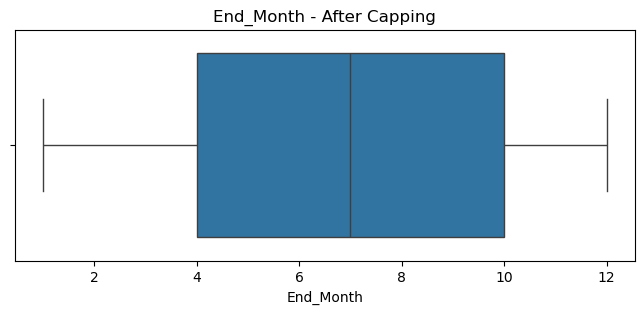

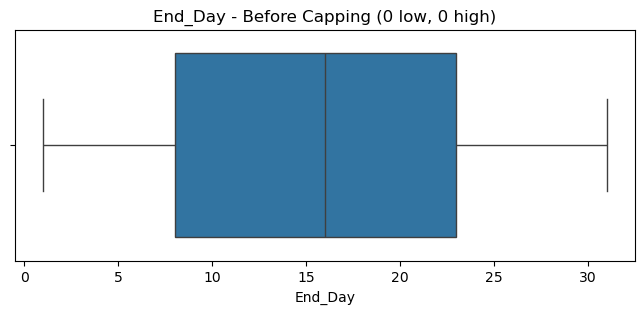

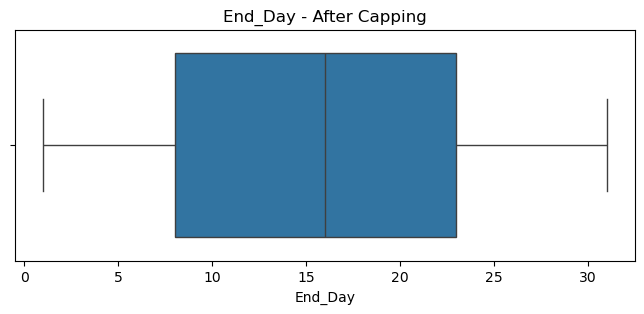

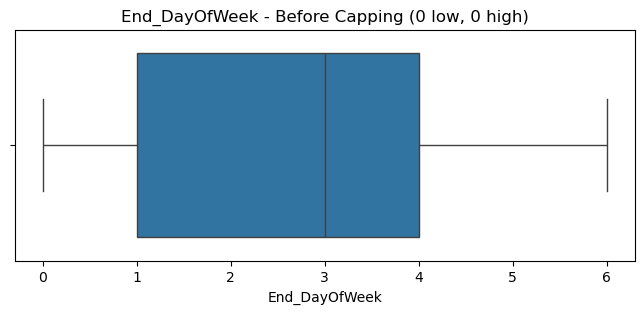

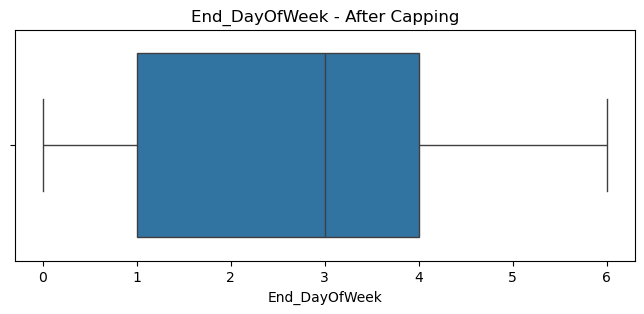

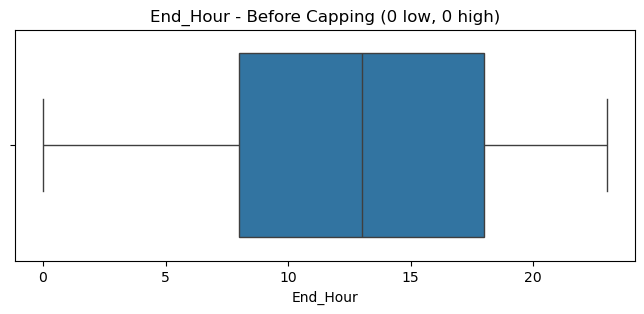

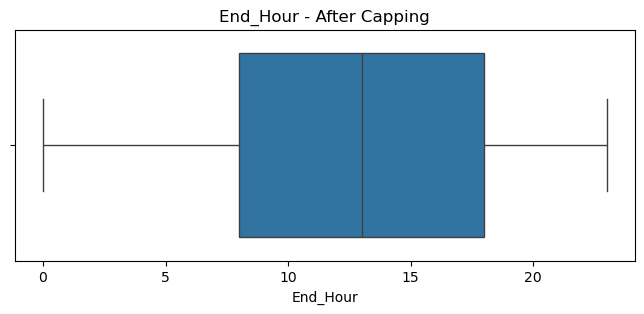

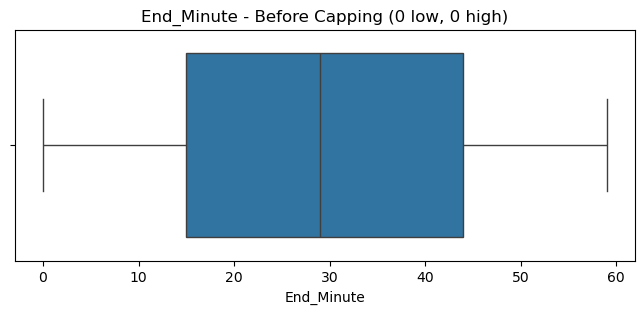

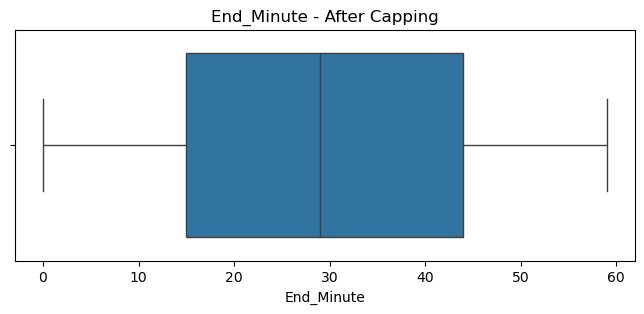

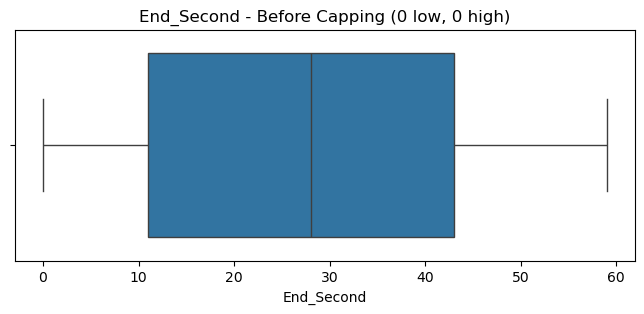

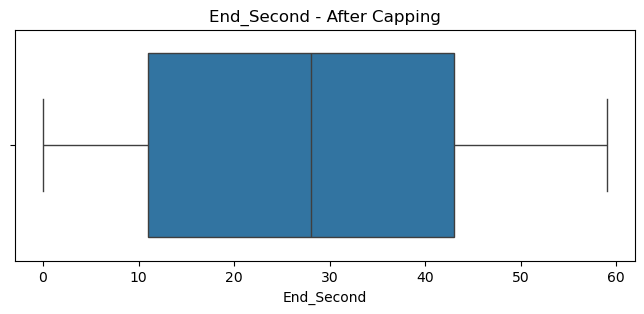

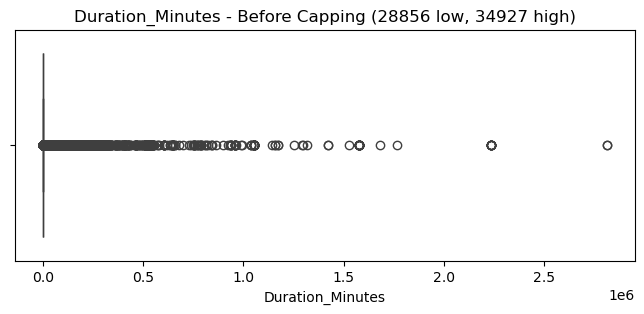

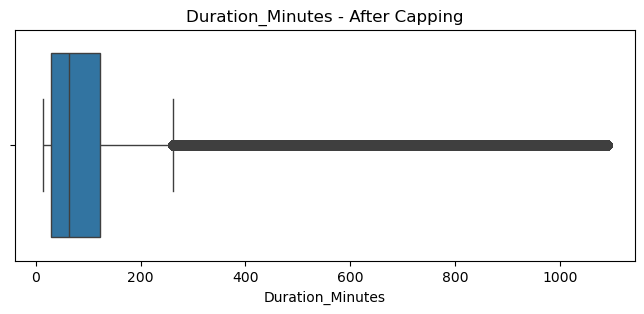

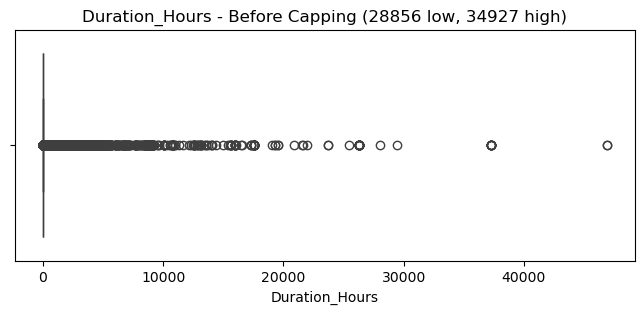

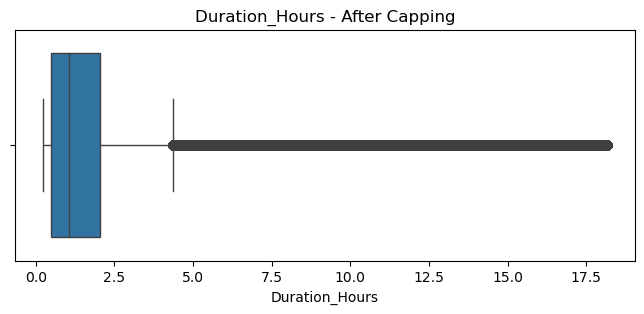

Start_Lat: {'capped_lower': 38638, 'capped_upper': 38635}
Start_Lng: {'capped_lower': 38640, 'capped_upper': 38642}
End_Lat: {'capped_lower': 21626, 'capped_upper': 21628}
End_Lng: {'capped_lower': 21627, 'capped_upper': 21629}
Distance(mi): {'capped_lower': 0, 'capped_upper': 38634}
Temperature(F): {'capped_lower': 34484, 'capped_upper': 33673}
Wind_Chill(F): {'capped_lower': 27283, 'capped_upper': 24012}
Humidity(%): {'capped_lower': 30931, 'capped_upper': 0}
Pressure(in): {'capped_lower': 37895, 'capped_upper': 36341}
Visibility(mi): {'capped_lower': 23210, 'capped_upper': 30845}
Wind_Speed(mph): {'capped_lower': 0, 'capped_upper': 32900}
Precipitation(in): {'capped_lower': 0, 'capped_upper': 27174}
Start_Year: {'capped_lower': 0, 'capped_upper': 0}
Start_Month: {'capped_lower': 0, 'capped_upper': 0}
Start_Day: {'capped_lower': 0, 'capped_upper': 0}
Start_DayOfWeek: {'capped_lower': 0, 'capped_upper': 0}
Start_Hour: {'capped_lower': 0, 'capped_upper': 0}
Start_Minute: {'capped_lower

In [10]:
#running the function:

df_clean, capped_summary = cap_outliers_with_plots(df)

# Print summary of capped values per column
for col, counts in capped_summary.items():
    print(f"{col}: {counts}")


In [11]:


def cap_outliers_with_before_after(df, lower_pct=0.005, upper_pct=0.995):
    """
    Detects outliers in continuous numeric columns using IQR, caps outliers
    using percentile thresholds, and returns a summary table with before/after counts.
    
    Parameters:
    - df: pandas DataFrame
    - lower_pct: lower percentile for capping (default 0.5%)
    - upper_pct: upper percentile for capping (default 99.5%)
    
    Returns:
    - df_capped: DataFrame with capped values
    - summary_df: DataFrame summarizing outliers and capping per column
    """
    
    df_capped = df.copy()
    
    # Select only continuous numeric columns
    numeric_cols = df_capped.select_dtypes(include='number').columns
    continuous_cols = [col for col in numeric_cols if df_capped[col].nunique() > 2]
    
    summary = pd.DataFrame(columns=[
        'Outliers_Before', 'Percent_Before', 
        'Capped_Lower', 'Capped_Upper',
        'Outliers_After', 'Percent_After'
    ])
    
    for col in continuous_cols:
        # --- Outliers before capping (IQR method) ---
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_iqr = Q1 - 1.5 * IQR
        upper_iqr = Q3 + 1.5 * IQR
        
        outliers_before = ((df_capped[col] < lower_iqr) | (df_capped[col] > upper_iqr)).sum()
        percent_before = outliers_before / len(df_capped) * 100
        
        # --- Percentile thresholds for capping ---
        lower_val = df_capped[col].quantile(lower_pct)
        upper_val = df_capped[col].quantile(upper_pct)
        
        capped_lower = (df_capped[col] < lower_val).sum()
        capped_upper = (df_capped[col] > upper_val).sum()
        
        # Apply capping
        df_capped[col] = df_capped[col].clip(lower_val, upper_val)
        
        # --- Outliers after capping (IQR method) ---
        outliers_after = ((df_capped[col] < lower_iqr) | (df_capped[col] > upper_iqr)).sum()
        percent_after = outliers_after / len(df_capped) * 100
        
        # Add to summary
        summary.loc[col] = [
            outliers_before, percent_before,
            capped_lower, capped_upper,
            outliers_after, percent_after
        ]
    
    summary_df = summary.sort_values('Percent_Before', ascending=False)
    
    return df_capped, summary_df


In [12]:
df_clean, outlier_summary = cap_outliers_with_before_after(df)

# View summary table
outlier_summary


,Outliers_Before,Percent_Before,Capped_Lower,Capped_Upper,Outliers_After,Percent_After
Visibility(mi),1481065.0,19.163943,23210.0,30845.0,1450220.0,18.764830
Distance(mi),963606.0,12.468386,0.0,38634.0,963606.0,12.468386
Duration_Hours,680043.0,8.799280,28856.0,34927.0,680043.0,8.799280
Duration_Minutes,680043.0,8.799280,28856.0,34927.0,680043.0,8.799280
Precipitation(in),533090.0,6.897811,0.0,27174.0,533090.0,6.897811
Pressure(in),443383.0,5.737065,37895.0,36341.0,443270.0,5.735603
Wind_Speed(mph),210603.0,2.725055,0.0,32900.0,210603.0,2.725055
Temperature(F),50515.0,0.653629,34484.0,33673.0,50403.0,0.652179
Wind_Chill(F),43869.0,0.567634,27283.0,24012.0,43835.0,0.567194
End_Minute,0.0,0.000000,0.0,0.0,0.0,0.000000


In [15]:
#save to pickle and move to imputation

df_clean.to_pickle("df_cleaned_with_outliers.pkl")

# If you want, you can also save the summary table
outlier_summary.to_pickle("summary_table.pkl")